In [1]:
import numpy as np
from foe_foundry.powers.selection import PowerSelector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng(20240711)

def plot_powers(powers: PowerSelector):
    names = [power.name for power in powers.all_powers]
    themes = [power.theme for power in powers.all_powers]
    types = [power.power_type for power in powers.all_powers]

    data: dict = dict(
        names=names,
        themes=themes,
        types=types
    )

    n_attempts = powers.probabilities_adjusted.shape[0]
    for n in range(n_attempts):
        data[f"probabilities_raw{n+1}"] = powers.probabilities_adjusted[n, :]
        data[f"probabilities_weighted{n+1}"] = powers.probabilities_weighted[n, :]
        data[f"probabilities_adjusted{n+1}"] = powers.probabilities_adjusted[n, :]

    df = pd.DataFrame(data)
    df["probabilities_raw"] = np.mean(df.filter(like="probabilities_raw").values, axis=1)
    df["probabilities_weighted"] = np.mean(df.filter(like="probabilities_weighted").values, axis=1)
    df["probabilities_adjusted"] = np.mean(df.filter(like="probabilities_adjusted").values, axis=1)

    df = df.sort_values(by="probabilities_raw", ascending=False)

    df1 = df.query("probabilities_raw > 0.00001")
    df2 = df.query("probabilities_weighted > 0.00001")
    df3 = df.query("probabilities_adjusted > 0.00001")



    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 20))
    sns.barplot(
        data = df1,
        x = "names",
        y = "probabilities_raw",
        hue="types",
        ax=ax1
    )
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

    sns.barplot(
        data = df2,
        x = "names",
        y = "probabilities_weighted",
        hue="types",
        ax=ax2
    )
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90);


    sns.barplot(
        data = df3,
        x = "names",
        y = "probabilities_adjusted",
        hue= "types",
        ax=ax3
    )
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90);

    fig.subplots_adjust(bottom=0.5, hspace=1.5);


/var/folders/lc/12pqrp5s0zq8q8wzx1m_x0zh0000gp/T/ipykernel_26778/236953836.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);
/var/folders/lc/12pqrp5s0zq8q8wzx1m_x0zh0000gp/T/ipykernel_26778/236953836.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90);
/var/folders/lc/12pqrp5s0zq8q8wzx1m_x0zh0000gp/T/ipykernel_26778/236953836.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90);


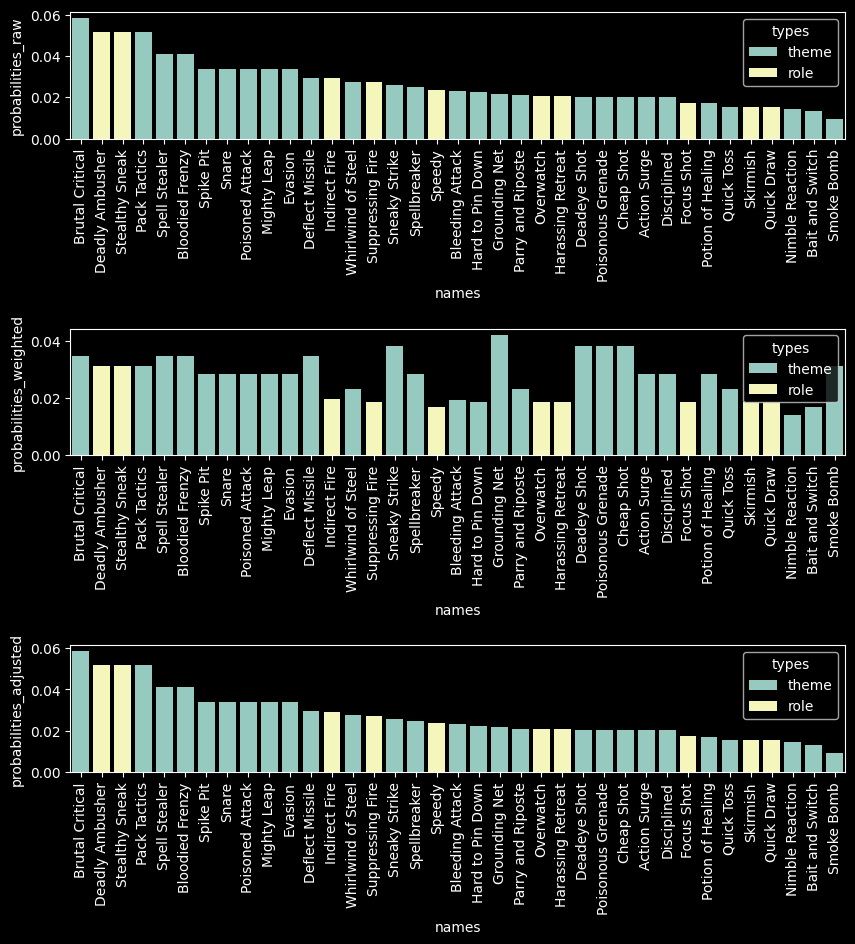

In [ ]:
from foe_foundry.creatures.spy import generate_spy, SpyMasterVariant
from foe_foundry.creatures.species import HumanSpecies

spy = generate_spy("Spy Master", cr=10, variant=SpyMasterVariant, species=HumanSpecies, rng=rng)
plot_powers(spy.powers)

/var/folders/lc/12pqrp5s0zq8q8wzx1m_x0zh0000gp/T/ipykernel_25879/236953836.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);
/var/folders/lc/12pqrp5s0zq8q8wzx1m_x0zh0000gp/T/ipykernel_25879/236953836.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90);
/var/folders/lc/12pqrp5s0zq8q8wzx1m_x0zh0000gp/T/ipykernel_25879/236953836.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90);


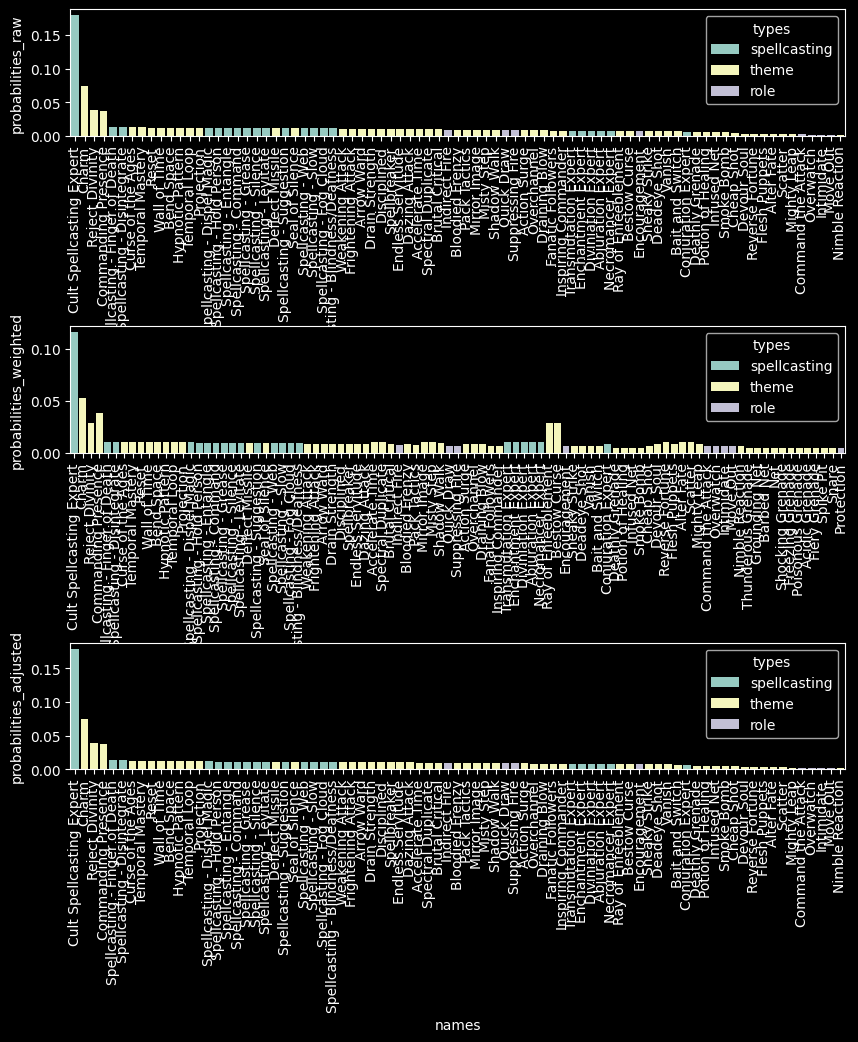

In [2]:
from foe_foundry.creatures.cultist import generate_cultist, CultistVariant
cultist = generate_cultist("Cultist Exarch", cr=18, variant=CultistVariant, rng=rng)
plot_powers(cultist.powers)

In [ ]:
from tests.eda.simulate import plot_simulation
from foe_foundry.creatures.spy import generate_spy, SpyMasterVariant
from foe_foundry.creatures.species import HumanSpecies
from foe_foundry.creatures.cultist import generate_cultist, CultistVariant

def make_spy(rng):
    spy = generate_spy("Spy Master", cr=10, variant=SpyMasterVariant, species=HumanSpecies, rng=rng)
    return spy

def make_cultist(rng):
    cultist = generate_cultist("Cultist Exarch", cr=18, variant=CultistVariant, rng=rng)
    return cultist


plot_simulation(make_spy, 1000)
plot_simulation(make_cultist, 1000)



/Users/evanrash/code/foe_foundry/tests/eda/simulate.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
